In [1]:
import utils,os
import importlib
import numpy as np
import pandas as pd
import pyperplot as ppp
import statsmodels.api as sm
import statsmodels.formula.api as smf

import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")
aa=np.asarray
mk=ppp.Marker('fig.yml')
%matplotlib inline

In [2]:
# fitted data
fitted=np.load("connect/data/sall.npy",allow_pickle=True).tolist()
fitted.keys()

dict_keys(['subject', 'area', 'accuracy', 'rt', 'rt2', 'ur_prop', 'acc_quantile', 'point', 'rel_area'])

In [3]:
folder='subj_csv_data'
subjects=['s01','s02','s03','s06','s08','s09','s10','s12','s13','s15']
subject='All Subjects'
len_subjects=len(subjects)
def reload(averaged_by='coh'):
    global avd
    importlib.reload(utils)
    avd=utils.AnalysisAvgData(folder,subjects,averaged_by=averaged_by)
reload()
figures_folder="figs/synthesis_all"
if not os.path.exists(figures_folder):
    os.mkdir(figures_folder)

# Figure 2

figure used in paper is stored in paper_figs/fig2/A.svg


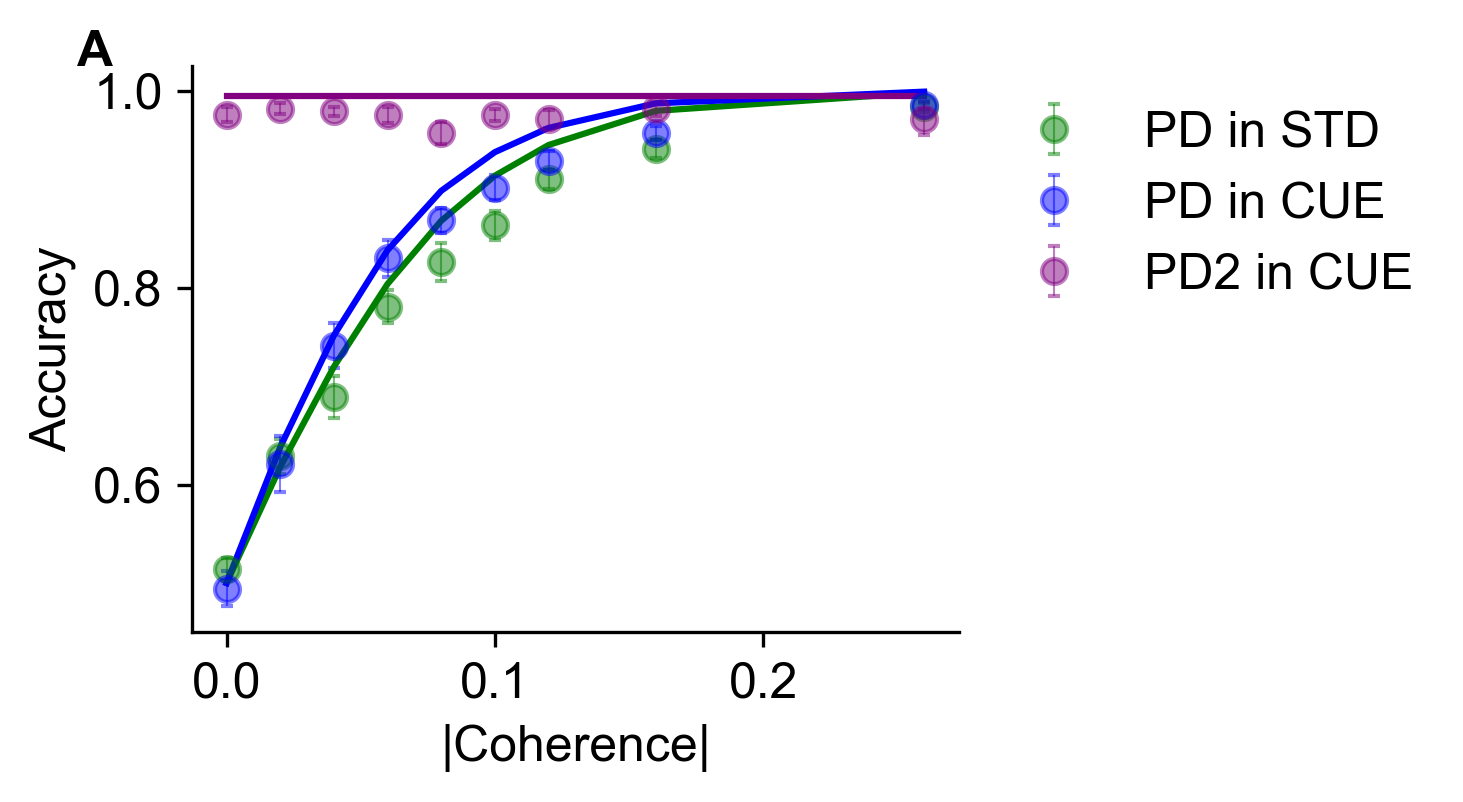

In [4]:
with ppp.SF("%s_proportion_no_opt_correct"%subject,figures_folder,mk) as (fig,axes):
    avd.plot_proportion(ax=axes,data=['no-up lr','opt-up lr','opt-up up'],prop_types=['correct'],errorbar=True,dirc=False,avg=True,comparable=True)
    utils.axSet(axes,xticks=None,
                title="%s proportion under different Coherences"%subject,
                xlabel="|Coherence|",ylabel="Accuracy")
    utils.gr_fitted(axes,fitted["accuracy"])

figure used in paper is stored in paper_figs/fig2/B.svg


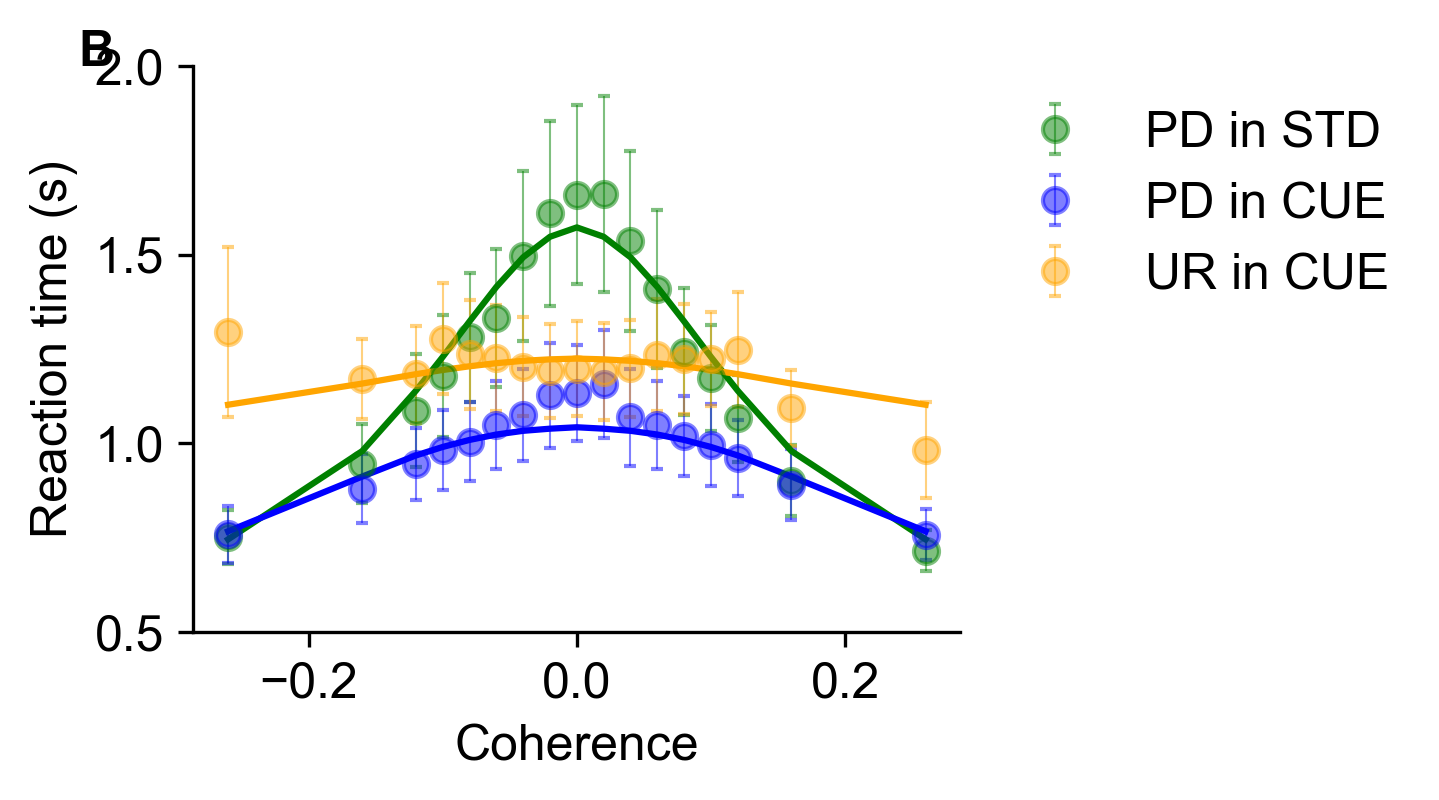

In [5]:
with ppp.SF("%s_responseTimeCoh_no_opt"%subject,figures_folder,mk) as (fig,axes):
    avd.plot_responseTime(ax=axes,data=['no-up lr','opt-up lr','opt-up up'],method='errorbar',dirc=True)
    utils.axSet(axes,xticks=None,title="%s First Stage Reaction time (s)"%subject,xlabel="Coherence",ylabel="Reaction time (s)",ylim=(0.5,2.0))
    utils.gr_fitted(axes,fitted["rt"])

figure used in paper is stored in paper_figs/fig2/C.svg


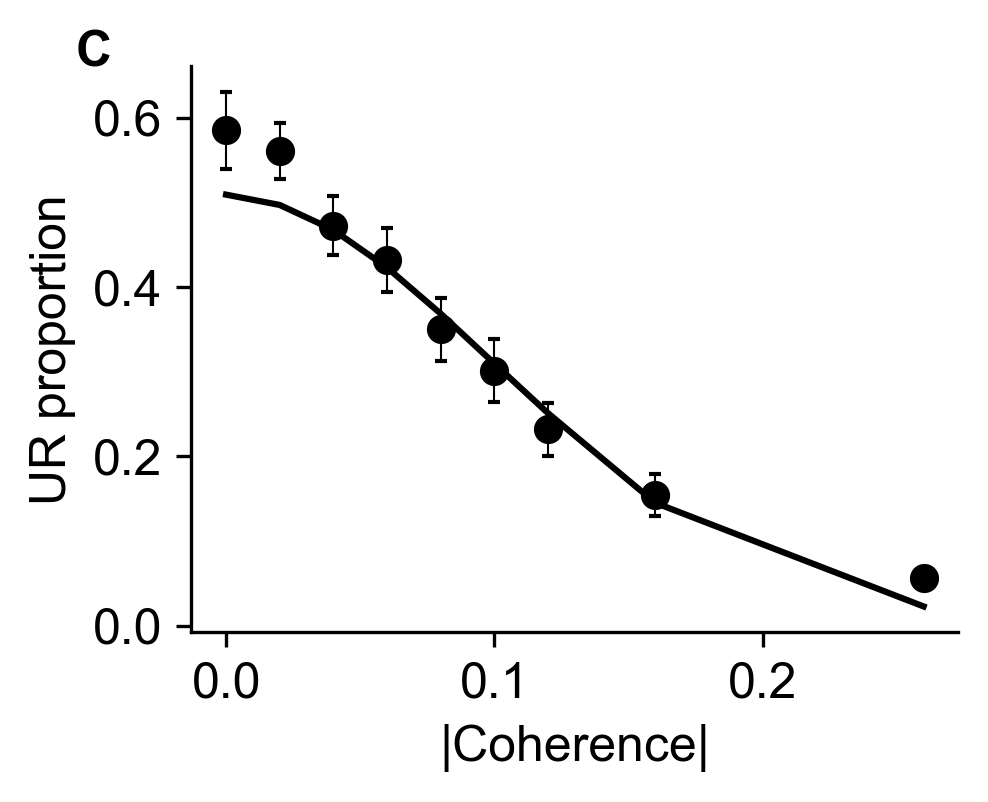

In [6]:
with ppp.SF("%s_proportion_no_opt_up"%subject,figures_folder,mk) as (fig,axes):
    avd.plot_proportion(ax=axes,data=['opt-up'],prop_types=['up'],errorbar=True,dirc=False,alpha=1)
    utils.axSet(axes,xticks=None,legend=None,
                title="%s proportion under different Coherences"%subject,
                xlabel="|Coherence|",ylabel="UR proportion")    
    utils.gr_fitted(axes,fitted["ur_prop"])

figure used in paper is stored in paper_figs/fig2/D.svg


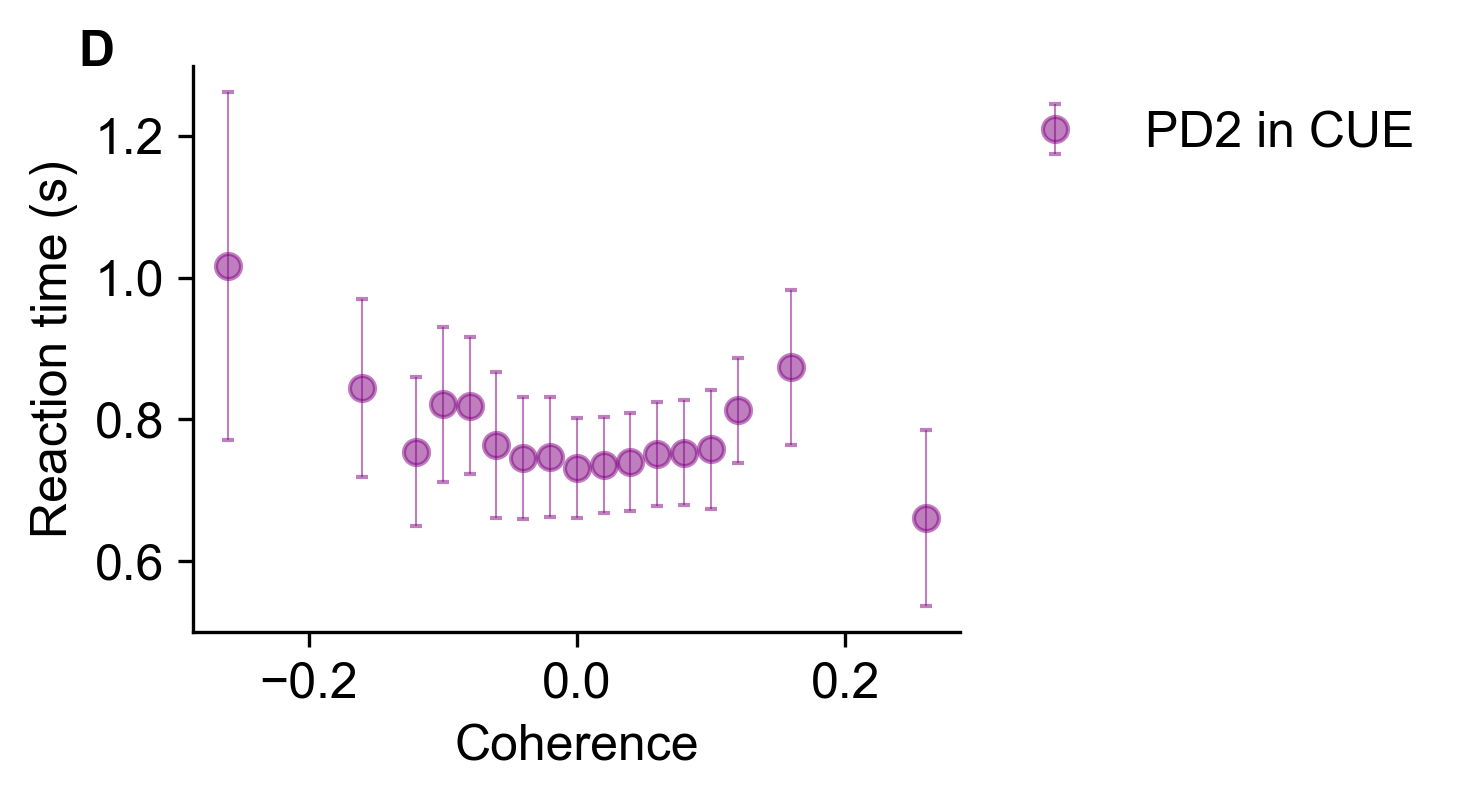

In [7]:
with ppp.SF("%s_responseTimeCoh_opt_2nd"%subject,figures_folder,mk) as (fig,axes):
    avd.plot_responseTime(ax=axes,data=['opt-up 2nd'],with_scatter=False,method='errorbar',dirc=True)
    utils.axSet(axes,xticks=None,title="%s Second Stage Reaction time (s)"%subject,xlabel="Coherence",ylabel="Reaction time (s)")

# Figure 5 E


In [8]:
reload(averaged_by='RT')
avdrt=utils.AnalysisAvgData(folder,subjects,averaged_by='RT')

figure used in paper is stored in paper_figs/fig5/E.svg


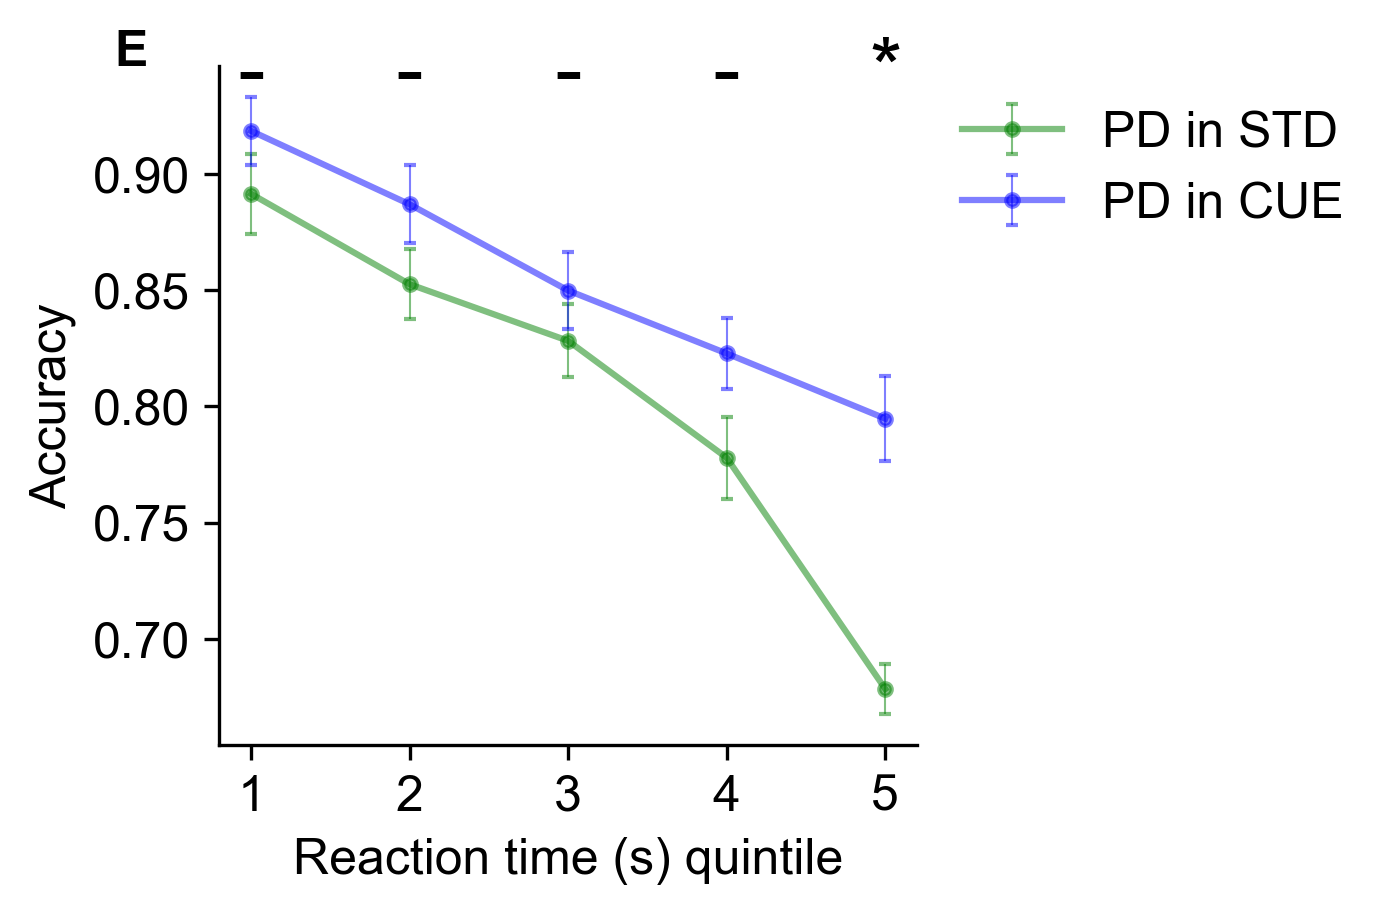

In [9]:
with ppp.SF("%s_rtAcc_no_opt"%subject,figures_folder,mk,figsize=(3,3)) as (fig,axes):
    avdrt.plot_rtAcc(ax=axes,data=['no-up lr','opt-up lr'],stat=True,fontsize=20,fmt='.-',mc=True)
    utils.axSet(axes,title="Reaction time Accuracy",xlabel="Reaction time (s) quintile",ylabel="Accuracy")